<a href="https://colab.research.google.com/github/benjaminhr/phosphene/blob/main/ai_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
"""
Either upload mp3 or download default track
"""
%cd /content

from google.colab import files
uploaded = files.upload()

if len(uploaded) > 0:
  audio_file = list(uploaded.keys())[0]

  with open('audio-sample.mp3', 'wb') as file:
    file.write(uploaded[audio_file])

  print(f"'{audio_file}' saved to disk as audio-sample.mp3")
else:
  print('🟡 No file uploaded - downloading from gdrive.')
  dropdown = 'nuclear-kittens' # @param ["sumu", "crust", "nuclear-kittens", "design", "getting-there", "in-my-room", "slovak"]
  !rm audio-sample.mp3 2>&1
  id = None
  if dropdown == 'sumu':
    id = "1zk76VIcb49LPy_UZ7ujXE4TSLOPAAeHt"
  elif dropdown == 'crust':
    id = "1p-fvt7zHuEB9pmsIpDstOgC60N7Vgzlr"
  elif dropdown == 'nuclear-kittens':
    id = "1G-2YQboT4Nv8SKeqMR_Gh1t2EKrtygEk"
  elif dropdown == 'design':
    id = "18KP2FHxz0a1QvURkfpxQrmePZugQqUzc"
  elif dropdown == 'getting-there':
    id = "1co8xU3UtGFBTw3nEQTeHpQjUFfVzU6Le"
  elif dropdown == 'in-my-room':
    id = "10R9vsBgDDRHv94FspFxGUPoXjvKjrHLG"
  elif dropdown == 'slovak':
    id = "12CukF_3ma97vmUo24fFLurdS-rWt37c6"

  !gdown $id -O audio-sample.mp3
# Remove old audio stems and samples
!rm -rf ./audio_output/audio-sample

/content


🟡 No file uploaded - downloading from gdrive.
Downloading...
From: https://drive.google.com/uc?id=1G-2YQboT4Nv8SKeqMR_Gh1t2EKrtygEk
To: /content/audio-sample.mp3
100% 213k/213k [00:00<00:00, 131MB/s]


# Web server & Tunnel

In [ ]:
%%shell
mkdir -p static
html='
<html>
<head>
<style>
html, body {
  background-color: black;
}

video {
  position: fixed;
  right: 0;
  bottom: 0;
  min-width: 100%;
  min-height: 100%;
  pointer-events: none;
}
</style>
<meta http-equiv="refresh" content="60" />
</head>
<p>hello world</p>
<video width="512" height="512" autoplay="autoplay" loop>
  <source src="static/output.mp4" type="video/mp4">
</html>
'

echo "$html" > static/index.html

In [ ]:
import os
from google.colab import userdata

# Passed in from colab left pane secrets window
token = userdata.get('cloudflare_token')
os.environ['cloudflare_token'] = token

In [ ]:
%%shell
curl -L --output cloudflared.deb https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb &&
sudo dpkg -i cloudflared.deb &&
sudo cloudflared service install $cloudflare_token

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 16.9M  100 16.9M    0     0  16.6M      0  0:00:01  0:00:01 --:--:-- 25.8M
Selecting previously unselected package cloudflared.
(Reading database ... 121747 files and directories currently installed.)
Preparing to unpack cloudflared.deb ...
Unpacking cloudflared (2024.2.0) ...
Setting up cloudflared (2024.2.0) ...
Processing triggers for man-db (2.10.2-1) ...
2024-02-09T07:27:28Z INF Using SysV
2024-02-09T07:27:28Z INF Linux service for cloudflared installed successfully


In [ ]:
import os
import threading

from flask import Flask
from flask import send_from_directory

app = Flask(__name__, static_folder='static')
port = "5000"

@app.route('/')
def send_file():
  return send_from_directory(app.static_folder, 'index.html')

threading.Thread(target=app.run, kwargs={"use_reloader": False}).start()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000


# Model Setup

In [173]:
%cd /content

/content


In [174]:
!git clone https://github.com/NVlabs/stylegan3.git

fatal: destination path 'stylegan3' already exists and is not an empty directory.


In [175]:
# StyleGAN3 WikiArt
# https://lambdalabs.com/blog/stylegan-3
# !gdown --id 1FrhHzBZXdIZVP-W0pVxHOe0-vtfE7Yl2

# StyleGAN3 landscapes
# https://github.com/justinpinkney/awesome-pretrained-stylegan3?tab=readme-ov-file
# !gdown --id 1AEqnsYfQzYIMm7Ea8ANLwmTevK1b23pr

# StyleGAN2 abstract art model
# https://github.com/justinpinkney/awesome-pretrained-stylegan2/tree/master?tab=readme-ov-file
# !gdown --id 1rKkJ1YnkJfGa1ineOSSBuT8Lal2w2qBq

# StyleGAN2 trypophobia
# https://github.com/justinpinkney/awesome-pretrained-stylegan2/tree/master?tab=readme-ov-file
# !gdown --id 1jKgxkGleeKbRxhxRqpV15ryWNqe7damM

# StyleGAN2 mapdreamer
# https://github.com/justinpinkney/awesome-pretrained-stylegan2/tree/master?tab=readme-ov-file
# !gdown --id 1BV_Sb6rImTfU7mgpSfwpMUzz9qIHqtt1

# StyleGAN2 figures
# https://github.com/justinpinkney/awesome-pretrained-stylegan2/tree/master?tab=readme-ov-file
!gdown --id 1csVCsTqkHeGviZsu7ckYEVqXgFq67d3Y

# StyleGAN2 floor plans
# https://github.com/justinpinkney/awesome-pretrained-stylegan2/tree/master?tab=readme-ov-file
# !gdown --id 1RBQLeuZj3vd2uPoD21hFYI2CFPgSDiy4

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1csVCsTqkHeGviZsu7ckYEVqXgFq67d3Y
From (redirected): https://drive.google.com/uc?id=1csVCsTqkHeGviZsu7ckYEVqXgFq67d3Y&confirm=t&uuid=0a46bebb-3a19-4f45-be36-a60940229868
To: /content/figures.pkl
100% 382M/382M [00:02<00:00, 135MB/s]


In [176]:
# fix for stylegan3 setup
!pip install Ninja

# Audio setup

In [206]:
%cd /content

/content


In [207]:
## Download mp3 from youtube
# youtube-dl --extract-audio --audio-format mp3 https://www.youtube.com/watch\?v\=mTm1wkVvoQM

## Cut video from 02:33 -> 02:55
# ffmpeg -ss 02:33 -i Sumu-4ZO7Gbt7og8.mp3 -t 20 -c copy output.mp3

In [208]:
!pip install --quiet spleeter

In [209]:
!spleeter separate -o audio_output -p spleeter:4stems audio-sample.mp3

INFO:spleeter:File audio_output/audio-sample/vocals.wav written succesfully
INFO:spleeter:File audio_output/audio-sample/drums.wav written succesfully
INFO:spleeter:File audio_output/audio-sample/bass.wav written succesfully
INFO:spleeter:File audio_output/audio-sample/other.wav written succesfully


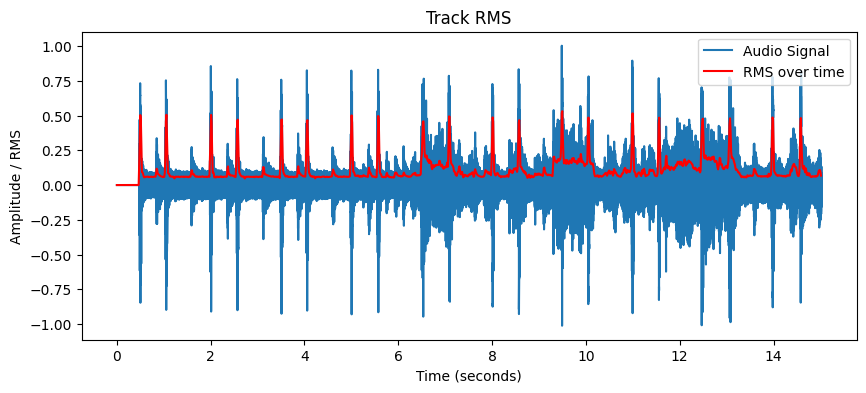

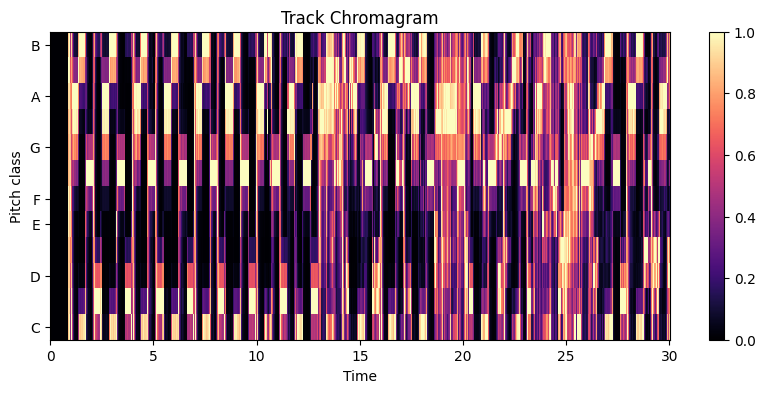

In [210]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as pltwd
import matplotlib.pyplot as plt

class AudioData:
  def __init__(self, time, time_rms, rms, audio, chroma):
    self.time = time
    self.time_rms = time_rms
    self.rms = rms
    self.audio = audio
    self.chroma = chroma

window_size = 1024
hop_size = 512

audio_track_path = "audio-sample.mp3"
audio, sr = librosa.load(audio_track_path, sr=None, mono=True)
rms = librosa.feature.rms(y=audio, frame_length=window_size, hop_length=hop_size)[0]

time = np.arange(0, len(audio)) / sr
time_rms = np.arange(0, len(rms)) * hop_size / sr

chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
chroma = chroma / np.max(chroma) # normalize

audio_track_data = AudioData(time, time_rms, rms, audio, chroma)

plt.figure(figsize=(10, 4))
plt.plot(audio_track_data.time, audio_track_data.audio, label='Audio Signal')
plt.plot(audio_track_data.time_rms, audio_track_data.rms, label='RMS over time', color='red')
plt.title("Track RMS")
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude / RMS')
plt.legend()

plt.figure(figsize=(10, 4))
librosa.display.specshow(audio_track_data.chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title(f'Track Chromagram')
plt.show()

In [211]:
tempo, beats = librosa.beat.beat_track(y=audio, sr=sr)
beat_onset_timestamps = librosa.frames_to_time(beats, sr=sr)
beat_onset_timestamps = np.round(beat_onset_timestamps, 2) * 100
print(beat_onset_timestamps)

def mean_difference(lst):
    if len(lst) < 2:
        return 0  # Return 0 or appropriate value if list is too short

    differences = [lst[i + 1] - lst[i] for i in range(len(lst) - 1)]
    mean_diff = sum(differences) / len(differences)
    return mean_diff

average_beat_time = round(mean_difference(beat_onset_timestamps))

[  86.  160.  237.  312.  387.  461.  538.  613.  688.  765.  838.  911.
  987. 1061. 1137. 1211. 1285.]


audio files: : ['other.wav', 'vocals.wav', 'drums.wav', 'bass.wav']


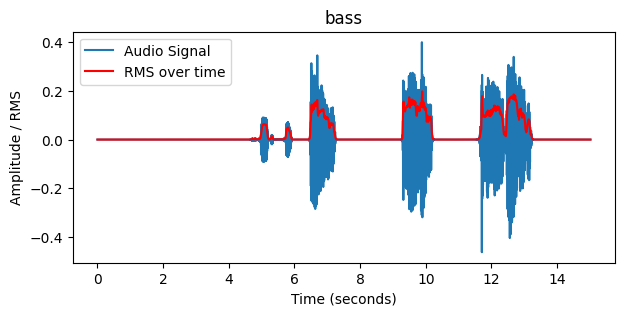

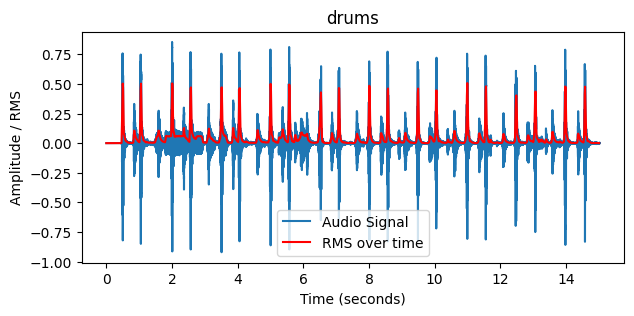

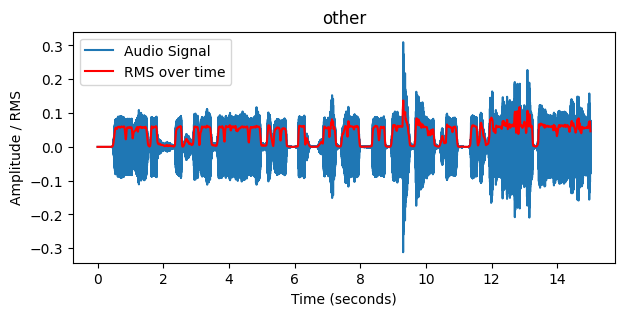

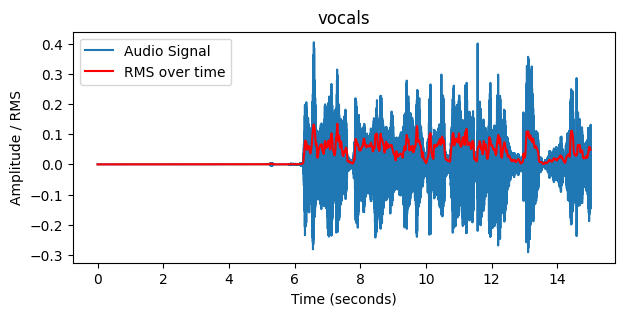

In [212]:
import os
import librosa
import numpy as np

audio_samples = {}
audio_folder = "audio_output/audio-sample"
audio_files = os.listdir(audio_folder)
print("audio files: :", audio_files)

window_size = 1024
hop_size = 512

for file_name in audio_files:
  track_name = os.path.splitext(file_name)[0] # removes extension
  file_path = os.path.join(audio_folder, file_name)
  audio, sr = librosa.load(file_path, sr=None, mono=True)
  rms = librosa.feature.rms(y=audio, frame_length=window_size, hop_length=hop_size)[0]

  time = np.arange(0, len(audio)) / sr
  time_rms = np.arange(0, len(rms)) * hop_size / sr

  chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
  chroma = chroma / np.max(chroma) # normalize
  audio_samples[track_name] = AudioData(time, time_rms, rms, audio, chroma)

for track in sorted(audio_samples.keys()):
  audio_data = audio_samples[track]
  plt.figure(figsize=(7, 3))
  plt.plot(audio_data.time, audio_data.audio, label='Audio Signal')
  plt.plot(audio_data.time_rms, audio_data.rms, label='RMS over time', color='red')
  plt.title(track)
  plt.xlabel('Time (seconds)')
  plt.ylabel('Amplitude / RMS')
  plt.legend()
plt.show()

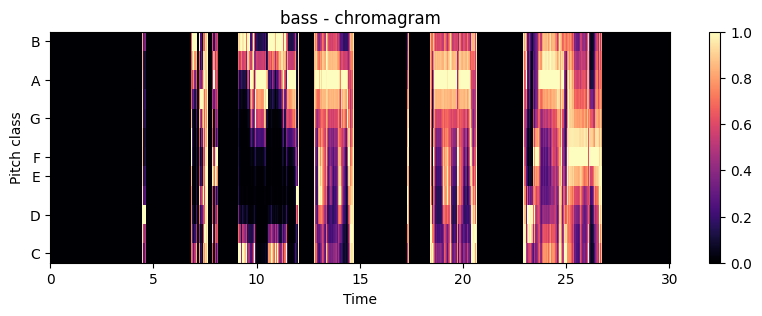

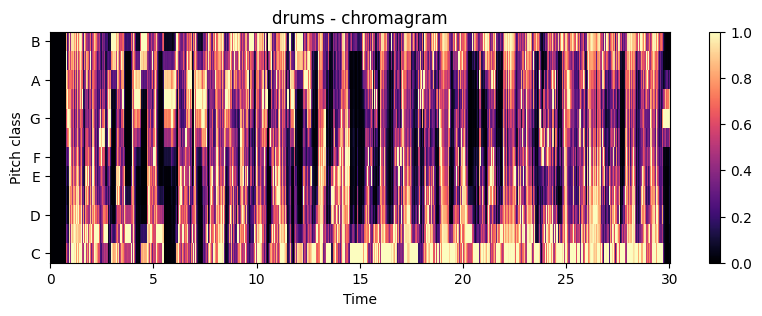

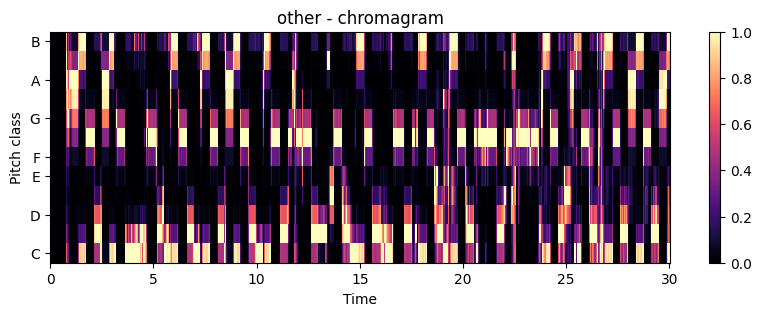

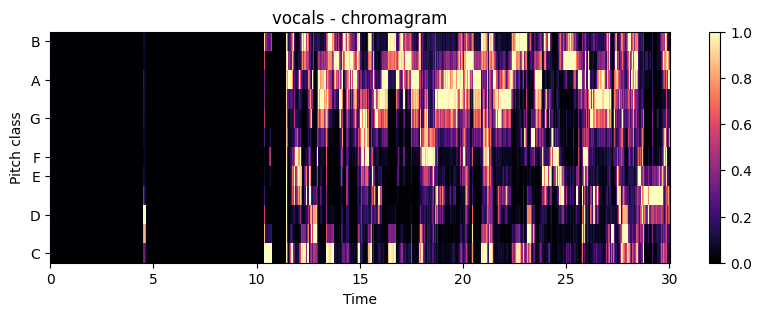

In [213]:
for track in sorted(audio_samples.keys()):
  audio_data = audio_samples[track]
  plt.figure(figsize=(10, 3))
  librosa.display.specshow(audio_data.chroma, y_axis='chroma', x_axis='time')
  plt.colorbar()
  plt.title(f'{track} - chromagram')
plt.show()

# Image Generation

In [ ]:
%cd stylegan3

/content/stylegan3


In [ ]:
for i in range(45, 48):
  !python3 gen_images.py --outdir=output --trunc=1 --seeds=$i --network=../abstract_art.pkl

Loading networks from "../abstract_art.pkl"...
Generating image for seed 45 (0/1) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Loading networks from "../abstract_art.pkl"...
Generating image for seed 46 (0/1) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Loading networks from "../abstract_art.pkl"...
Generating image for seed 47 (0/1) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


seed0047.png


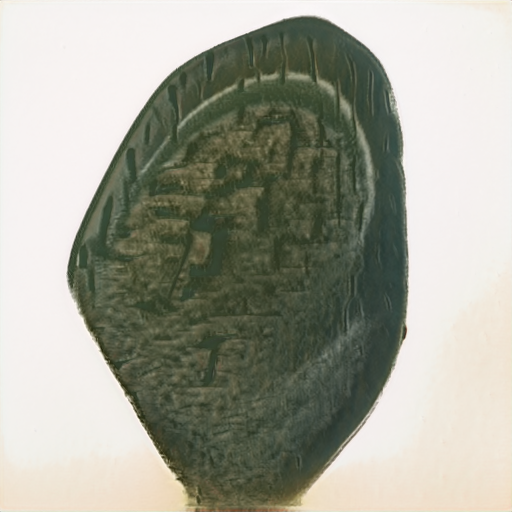

seed0046.png


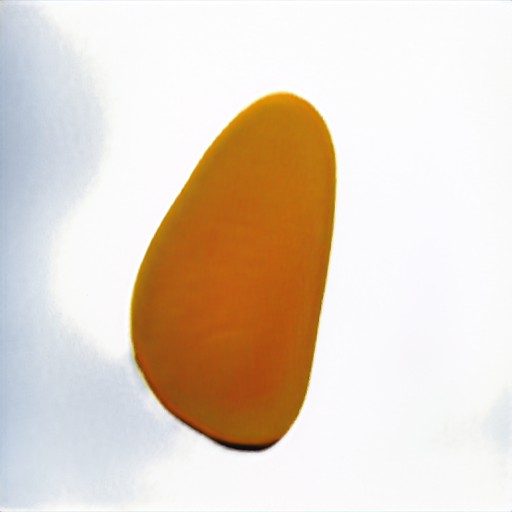

seed0045.png


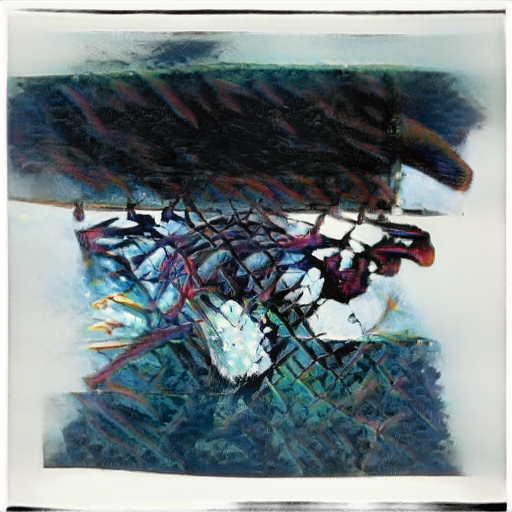

In [ ]:
from PIL import Image
import os
from IPython.display import display

# Path to the folder containing images
folder_path = "output"
output_size = (512, 512)

# Get the list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.gif'))]

# Display each resized image
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)

    print(image_file)
    # Open and resize the image
    img = Image.open(image_path)
    img = img.resize(output_size)

    # Display the resized image
    display(img)

# Video Generation

In [ ]:
!python ./gen_video.py --output="../video-${RANDOM}.mp4" --trunc=5 --seeds=150-170 --w-frames=200 --grid=1x1 --network=../wikiart.pkl

Loading networks from "../wikiart.pkl"...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.
100% 4200/4200 [11:19<00:00,  6.18it/s]


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
!cp ../video-18509.mp4 '/content/gdrive/My Drive'

Mounted at /content/gdrive


# Audio Visualisation

In [ ]:
%cd stylegan3

/content/stylegan3


In [ ]:
import torch
import dnnlib
import legacy

network_pkl = "../wikiart.pkl"
print('Loading networks from "%s"...' % network_pkl)
device = torch.device('cuda')
with dnnlib.util.open_url(network_pkl) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device)

Loading networks from "../wikiart.pkl"...


In [ ]:
import PIL.Image

seed = 504
seed_idx = 0
seeds = [0]

z = torch.from_numpy(np.random.RandomState(seed).randn(1, G.z_dim)).to(device)
label = torch.zeros([1, G.c_dim], device=device)

truncation_psi = 1
noise_mode = "const"

img = G(z, label, truncation_psi=truncation_psi, noise_mode=noise_mode)
img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB').save(f'../seed{seed}-test2.png')

Generating image for seed 504 (0/1) ...


In [ ]:
w_avg = G.mapping.w_avg

In [ ]:
from scipy.interpolate import interp1d

def get_ws(n, frames, seed):
    filename = f'../ws_{n}_{frames}_{seed}.npy'
    if not os.path.exists(filename):
      src_ws = np.random.RandomState(seed).randn(n, 512)
      ws = np.empty((frames, 512))
      for i in range(512):
        x = np.linspace(0, 3*frames, 3*len(src_ws), endpoint=False)
        y = np.tile(src_ws[:, i], 3)
        x_ = np.linspace(0, 3*frames, 3*frames, endpoint=False)
        y_ = interp1d(x, y, kind='quadratic', fill_value='extrapolate')(x_)
        ws[:, i] = y_[frames:2*frames]
      np.save(filename, ws)
    else:
      ws = np.load(filename)
    return ws

In [ ]:
def mix_styles(wa, wb, ivs):
  w = np.copy(wa)
  for i, v in ivs:
      w[i] = wa[i] * (1 - v) + wb[i] * v
  return w

In [ ]:
def render_frame(t):
  base_index = 0
  frame = np.clip(int(np.round(t * fps)), 0, frames - 1)

  seed = 504
  resolution = 10
  seconds = int(np.ceil(duration))

  base_frames = resolution * frames

  psi = 0.5 + audio_samples['bass'][frame] / 2

  w_avg_numpy = w_avg.cpu().numpy()

  base_ws = get_ws(seconds, base_frames, seed)
  base_w = base_ws[int(round(base_index)) % len(base_ws)]
  base_w = np.tile(base_w, (18, 1))
  base_w = w_avg_numpy + (base_w - w_avg_numpy) * psi

  mix_ws = get_ws(seconds, frames, seed + 1)
  mix_w = np.tile(mix_ws[frame], (18, 1))
  mix_w = w_avg_numpy + (mix_w - w_avg_numpy) * 0.75

  ranges = [range(0, 4), range(4, 8), range(8, 18)]
  values = [audio_samples[track][frame] for track in audio_samples]

  w = mix_styles(base_w, mix_w, zip(ranges, values))
  w += audio_samples['vocals'][frame] * 1.5

  # image = Gs.components.synthesis.run(np.stack([w]), **Gs_syn_kwargs)[0]
  # image = PIL.Image.fromarray(image).resize((size, size), PIL.Image.LANCZOS)
  # return np.array(image)

  label = torch.zeros([1, G.c_dim], device=device)
  img = G(torch.from_numpy(w).to(device), label, noise_mode='const')
  img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
  img = PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')
  # PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB').save('../whtrrv.png')
  return np.array(img)

In [ ]:
import moviepy.editor
import PIL.Image

mp3_audio_track = '../audio_sample.mp3'
audio_clip = moviepy.editor.AudioFileClip(mp3_audio_track).subclip(0,6)

video_clip = moviepy.editor.VideoClip(render_frame, duration=duration).subclip(0,6)
video_clip = video_clip.set_audio(audio_clip)

output_video_name = "../output.mp4"
video_clip.write_videofile(output_video_name, fps=fps, codec='libx264', audio_codec='aac', bitrate='8M')

Moviepy - Building video ../output.mp4.
MoviePy - Writing audio in outputTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../output.mp4



Moviepy - Done !
Moviepy - video ready ../output.mp4


In [ ]:
%cd stylegan3

/content/stylegan3


In [ ]:
import os
import numpy as np
from scipy.interpolate import interp1d
from scipy.io import wavfile
import matplotlib.pyplot as plt
import PIL.Image
import moviepy.editor

import dnnlib

fps = 60
seed = 9194850
w_avg = G.mapping.cpu().w_avg.numpy()

def get_ws(n, frames, seed):
    filename = f'./data/ws_{n}_{frames}_{seed}.npy'
    if not os.path.exists(filename):
        src_ws = np.random.RandomState(seed).randn(n, 512)
        ws = np.empty((frames, 512))
        for i in range(512):
            # FIXME: retarded
            x = np.linspace(0, 3*frames, 3*len(src_ws), endpoint=False)
            y = np.tile(src_ws[:, i], 3)
            x_ = np.linspace(0, 3*frames, 3*frames, endpoint=False)
            y_ = interp1d(x, y, kind='quadratic', fill_value='extrapolate')(x_)
            ws[:, i] = y_[frames:2*frames]
        np.save(filename, ws)
    else:
        ws = np.load(filename)
    return ws

def mix_styles(wa, wb, ivs):
    w = np.copy(wa)
    for i, v in ivs:
        w[i] = wa[i] * (1 - v) + wb[i] * v
    return w

def normalize_vector(v):
    return v * np.std(w_avg) / np.std(v) + np.mean(w_avg) - np.mean(v)

def render_frame(t):
    global base_index
    frame = np.clip(np.int(np.round(t * fps)), 0, frames - 1)
    base_index += base_speed * audio_samples['vocals'][frame]**2
    base_w = base_ws[int(round(base_index)) % len(base_ws)]
    base_w = np.tile(base_w, (18, 1))
    psi = 0.5 + audio_samples['drums'][frame] / 2
    base_w = w_avg + (base_w - w_avg) * psi
    mix_w = np.tile(mix_ws[frame], (18, 1))
    mix_w = w_avg + (mix_w - w_avg) * 0.75
    ranges = [range(0, 4), range(4, 8), range(8, 18)]
    values = [audio_samples[track][frame] for track in ['bass', 'vocals', 'drums']]
    w = mix_styles(base_w, mix_w, zip(ranges, values))
    w += mouth_open * audio_samples['bass'][frame] * 1.5

    w = torch.from_numpy(np.stack([np.delete(w, [16,17], axis=0)])).to(device)

    img = G.synthesis(w, noise_mode='const', force_fp32=True)
    # image = PIL.Image.fromarray(image.cpu().numpy()).resize((size, size), PIL.Image.LANCZOS)
    img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
    img = PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')
    return np.array(img)

size = 1080
seconds = int(np.ceil(duration))
resolution = 10
base_frames = resolution * frames
base_ws = get_ws(seconds, base_frames, seed)
base_speed = base_frames / sum(audio_samples['drums']**2)
base_index = 0
mix_ws = get_ws(seconds, frames, seed + 1)
mouth_open = normalize_vector(-np.load('data/mouth_ratio.npy'))

mp3_audio_track = '../audio_sample.mp3'
audio_clip = moviepy.editor.AudioFileClip(mp3_audio_track).subclip(0,6)

video_clip = moviepy.editor.VideoClip(render_frame, duration=duration).subclip(0,6)
video_clip = video_clip.set_audio(audio_clip)

output_video_name = "../output.mp4"
video_clip.write_videofile(output_video_name, fps=fps, codec='libx264', audio_codec='aac', bitrate='8M')

Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  frame = np.clip(np.int(np.round(t * fps)), 0, frames - 1)



Moviepy - Building video ../output.mp4.
MoviePy - Writing audio in outputTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../output.mp4



Moviepy - Done !
Moviepy - video ready ../output.mp4


# Video Testbed

In [214]:
%cd stylegan3

/content/stylegan3


In [215]:
import torch
import dnnlib
import legacy

# network_pkl = "../wikiart.pkl"
# network_pkl = "../abstract-art.pkl"
# network_pkl = "../landscapes.pkl"
# network_pkl = "../mapdreamer.pkl"
# network_pkl = "../trypophobia.pkl"
# network_pkl = "../figures.pkl"
network_pkl = "../floor-plans.pkl"
print('Loading networks from "%s"...' % network_pkl)

device = torch.device('cuda')
with dnnlib.util.open_url(network_pkl) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device)
print("✅ Network loaded")

Loading networks from "../floor-plans.pkl"...
✅ Network loaded


In [216]:
import random

# seeds = [i for i in range(310, 330)]
# seeds = [1,2,3,4,5,6,7]
audio_track_length_seconds = round(audio_track_data.time[-1])
# seeds = [i for i in range(audio_track_length_seconds)]

seeds = []
getSeed = lambda i : random.randint((i + 1) * i, (i + 1) * i * 2)
# check duplicates
for i in range(audio_track_length_seconds):
  while True:
    seed = getSeed(i)
    if seed not in seeds:
      seeds.append(seed)
      break

num_keyframes = len(seeds)
w_frames = 30 * 2
# w_frames = average_beat_time
total_frame_count = num_keyframes * w_frames

lerp_kind = 'quadratic'
wraps = 2
psi = 2
noise_mode = 'const'
output_video_path = "../output.mp4"

In [217]:
def format_img(img):
  # all 1's are grid_w/h
  channels, img_h, img_w = img.shape
  img = (img * 127.5 + 128).clamp(0, 255).to(torch.uint8)
  img = img.reshape(1, 1, channels, img_h, img_w)
  img = img.permute(2, 0, 3, 1, 4)
  img = img.reshape(channels, 1 * img_h, 1 * img_w)
  img = img.permute(1, 2, 0)
  img = img.cpu().numpy()
  return img

In [218]:
import scipy
import imageio
from tqdm import tqdm
import numpy as np

# Latents and weights[]
z = [np.random.RandomState(seed).randn(G.z_dim) for seed in seeds]
zs = torch.from_numpy(np.stack(z)).to(device)
ws = G.mapping(z=zs, c=None, truncation_psi=psi)
_ = G.synthesis(ws[:1]) # warm up

# Interpolation.
x = np.arange(-num_keyframes * wraps, num_keyframes * (wraps + 1))
y = np.tile(ws.cpu().numpy(), [wraps * 2 + 1, 1, 1])
interp = scipy.interpolate.interp1d(x, y, kind=lerp_kind, axis=0)

# Render video.
video_out = imageio.get_writer(output_video_path, mode='I', fps=60, codec='libx264')
for frame_idx in tqdm(range(total_frame_count)):
    interp_x = frame_idx / w_frames
    w = torch.from_numpy(interp(interp_x)).to(device).unsqueeze(0)

    for i in range(16):
      ## Missing "vocal" stem
      if i <= 3:
        w[0][i] += audio_samples['bass'].rms[frame_idx] * (2 + audio_track_data.rms[frame_idx])
      elif i >= 8 and i <= 12:
        w[0][i] += audio_samples['other'].rms[frame_idx] * (1 + audio_track_data.rms[frame_idx])
      elif i > 13 and i <= 16:
        w[0][i] += audio_samples['drums'].rms[frame_idx] * (2 + audio_track_data.rms[frame_idx])

    img = G.synthesis(ws=w, noise_mode=noise_mode)[0]
    img = format_img(img)
    # if audio_track_data.rms[frame_idx] < 0.1:
    #   grey_scale = np.array([0.2989, 0.5870, 0.1140])
    #   img = (img * grey_scale).astype(img.dtype)
    video_out.append_data(img)
video_out.close()

100%|██████████| 900/900 [00:37<00:00, 24.15it/s]


In [219]:
# Join full audio sample with video -> output-merged.mp4
!ffmpeg -y -hide_banner -loglevel error -i ../output.mp4 -i ../audio-sample.mp3 -c:v copy -c:a aac ../output-merged.mp4

In [220]:
import os
import datetime
import shutil
from google.colab import drive

"""
Upload visualisation to google drive and copy it to the
static folder as well
"""

drive.mount('/content/drive', force_remount=False)
drive_workspace = '/content/drive/MyDrive/ml_work'

old_video_files = [file for file in os.listdir(drive_workspace) if file.startswith("video-")]
for video_file in old_video_files:
  os.remove(f"{drive_workspace}/{video_file}")

now = datetime.datetime.now() + datetime.timedelta(hours=2)
new_file_path = f"{drive_workspace}/video-{now.hour}:{now.minute}.mp4"
shutil.copy("../output-merged.mp4", new_file_path)

if os.path.isdir("../static"):
  os.remove("../static/output.mp4") if os.path.exists('../static/output.mp4') else None
  shutil.move("../output-merged.mp4", "../static/output.mp4")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Testing StyleGAN3-fun

In [ ]:
!git clone https://github.com/PDillis/stylegan3-fun.git

Cloning into 'stylegan3-fun'...
remote: Enumerating objects: 744, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 744 (delta 23), reused 45 (delta 23), pack-reused 698
Receiving objects: 100% (744/744), 4.49 MiB | 18.09 MiB/s, done.
Resolving deltas: 100% (468/468), done.


In [ ]:
%cd stylegan3-fun

/content/stylegan3-fun


In [ ]:
!python ./gen_images.py --available-layers

Usage: gen_images.py [OPTIONS]
Try 'gen_images.py --help' for help.

Error: No such option: --available-layers


In [ ]:
!python ./gen_video.py --output="../video-${RANDOM}.mp4" --trunc=1 --seeds=150-160 --w-frames=60 --grid=1x1 --network=../wikiart.pkl

Loading networks from "../wikiart.pkl"...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.
100% 660/660 [01:12<00:00,  9.17it/s]


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
!cp ../video-18855.mp4 '/content/gdrive/My Drive'

Mounted at /content/gdrive
